# Minimal Model

[![Google Colab](https://badgen.net/badge/Launch/on%20Google%20Colab/blue?icon=github)](https://colab.research.google.com/github/sflippl/predicode/blob/master/usage/minimal_model.ipynb)

In [11]:
try:
    import predicode as pc
except:
    !pip install git+https://github.com/sflippl/predicode
    import predicode as pc
try:
    import lazytools_sflippl as lazytools
except: 
    !pip install git+https://github.com/sflippl/lazytools
    import lazytools_sflippl as lazytools

'predicode' contains several^[so far one] high-level interfaces to the more general hierarchical model^[not yet a thing]. We will use the minimal model, consisting of an input layer and one latent layer with a specified number of dimensions as an example. As an example, we will use an artificial dataset as presented in the previous chapter.

In [3]:
art = pc.DecayingMultiNormal(dimensions = 10, 
                             samples = 100)

The minimal model can be fitted by providing input data and the number of latent dimensions to the class 'pc.MinimalHierarchicalModel':

In [4]:
hpc = pc.MinimalHierarchicalModel(input_data = art.data, 
                                  latent_dimensions = 4)

W0824 15:59:17.338732 139821115447104 estimator.py:1811] Using temporary folder as model directory: /tmp/tmp8kmjnddb


## State Estimation

By default the weights of the minimal model are initialized as the first PCA components. This is the optimal solution for the minimal model and can be used to study state estimation. Since a predictive coding model can improve either by adapting its states or its weights, we first need to specify which of the two can currently be modified:

In [5]:
hpc.activate('state')

(Technically, this would not have been necessary.) States are activated by default.

The minimal model can then be trained in order to extract the latent values.

In [6]:
hpc.train()

W0824 15:59:18.510554 139821115447104 deprecation.py:323] From /home/sflippl/.local/lib/python3.7/site-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0824 15:59:18.523109 139821115447104 deprecation_wrapper.py:119] From /home/sflippl/.local/lib/python3.7/site-packages/predicode/hierarchical/interfaces/minimal_model.py:24: The name tf.feature_column.input_layer is deprecated. Please use tf.compat.v1.feature_column.input_layer instead.

W0824 15:59:18.524461 139821115447104 deprecation.py:323] From /home/sflippl/.local/lib/python3.7/site-packages/tensorflow/python/feature_column/feature_column.py:205: NumericColumn._get_dense_tensor (from tensorflow.python.feature_column.feature_column_v2) is deprecated and w

The usual Tensorflow framework can be used in this context:

In [7]:
hpc.evaluate()

W0824 15:59:23.045202 139821115447104 deprecation.py:323] From /home/sflippl/.local/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


{'loss': 3.4082903e-05, 'global_step': 10000}

The method 'latent_values' allows for the extraction of the latent values, which we here visualize using a heatmap:

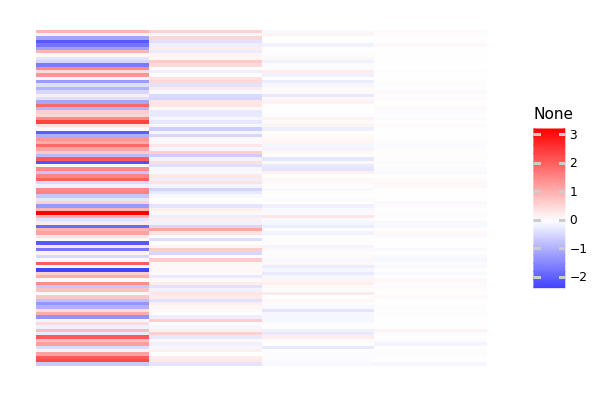

<ggplot: (8738711660976)>

In [8]:
latent_values = hpc.latent_values()
lazytools.matrix_heatmap(latent_values, pole = 0)

Similarly the predictions generated by the latent values can be studied:

W0824 15:59:23.500001 139821115447104 estimator.py:1000] Input graph does not use tf.data.Dataset or contain a QueueRunner. That means predict yields forever. This is probably a mistake.


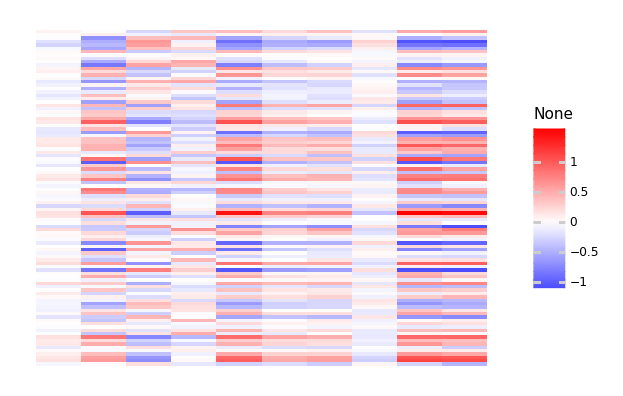

<ggplot: (8738711440090)>

In [9]:
predictions = hpc.predict()
lazytools.matrix_heatmap(predictions, pole = 0)